# California House Pricing

* **Problem Statement**
  * Target variable is 'Median_House_Value'
  * The basic objective of the project is to analyze the California_Housing_Prces (modified dataset) and predict the 'Median House Value' based on several demographic and other characteristics in California, also find the driving factors which affects the 'Mediann House Value' the most. 
  * In major cities in US including california , real estate industry is inflating , so our model will help tackle the house value by accurately predicting the value based on the factors we have in the dataset 

# Context
This is the dataset is a modified version of the California Housing Data used in the paper Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being too toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.
# Modifications with respect to the original data

This dataset includes 5 extra features defined by author: "Distance to coast", "Distance to Los Angeles", "Distance to San Diego", "Distance to San Jose", and "Distance to San Francisco". These extra features try to account for the distance to the nearest coast and the distance to the centre of the largest cities in California.
The distances were calculated using the Haversine formula with the Longitude and Latitude: (Image shown below)

https://wikimedia.org/api/rest_v1/media/math/render/svg/a65dbbde43ff45bacd2505fcf32b44fc7dcd8cc0

where:

phi_1 and phi_2 are the Latitudes of point 1 and point 2, respectively
lambda_1 and lambda_2 are the Longitudes of point 1 and point 2, respectively
r is the radius of the Earth (6371km)

# Content
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The columns are as follows, their names are pretty self-explanatory:

1) Median House Value: Median house value for households within a block (measured in US Dollars) [$]

2) Median Income: Median income for households within a block of houses (measured in tens of thousands of US Dollars) [10k$]

3) Median Age: Median age of a house within a block; a lower number is a newer building [years]

4) Total Rooms: Total number of rooms within a block

5) Total Bedrooms: Total number of bedrooms within a block

6) Population: Total number of people residing within a block

7) Households: Total number of households, a group of people residing within a home unit, for a block

8) Latitude: A measure of how far north a house is; a higher value is farther north [°]

9) Longitude: A measure of how far west a house is; a higher value is farther west [°]

10) Distance to coast: Distance to the nearest coast point [m]

11) Distance to Los Angeles: Distance to the centre of Los Angeles [m]

12) Distance to San Diego: Distance to the centre of San Diego [m]

13) Distance to San Jose: Distance to the centre of San Jose [m]

14) Distance to San Francisco: Distance to the centre of San Francisco [m]

# Source
This data was entirely modified and cleaned by me. The original data (without the distance features) was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

The original dataset can be found under the following link: https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

## Dataset Link
https://www.kaggle.com/fedesoriano/california-housing-prices-data-extra-features

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
import sklearn.ensemble
plt.rcParams['figure.figsize'] = 18,7
import statsmodels.api as sm
import sklearn.metrics as metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
df = pd.read_csv('California_Houses.csv')

In [5]:
df.head()

Median_House_Value  ...  Distance_to_SanFrancisco
0            452600.0  ...              21250.213767
1            358500.0  ...              20880.600400
2            352100.0  ...              18811.487450
3            341300.0  ...              18031.047568
4            342200.0  ...              18031.047568

[5 rows x 14 columns]

## Data Understanding

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [7]:
df.shape

(20640, 14)

In [8]:
df.describe()

Median_House_Value  ...  Distance_to_SanFrancisco
count        20640.000000  ...              20640.000000
mean        206855.816909  ...             386688.422291
std         115395.615874  ...             250122.192316
min          14999.000000  ...                456.141313
25%         119600.000000  ...             117395.477505
50%         179700.000000  ...             526546.661701
75%         264725.000000  ...             584552.007907
max         500001.000000  ...             903627.663298

[8 rows x 14 columns]

### Inference:
* 'Median_House_Value' - Target Variable with min_value as 14999`$` and max_value as 500001`$`.
* Several features contains high standard_deviation and range (max-min) of these features are very high.
* The mean and median values have significant difference for some features, which represents skewness in the variables.

## Data analysis and preprocessing

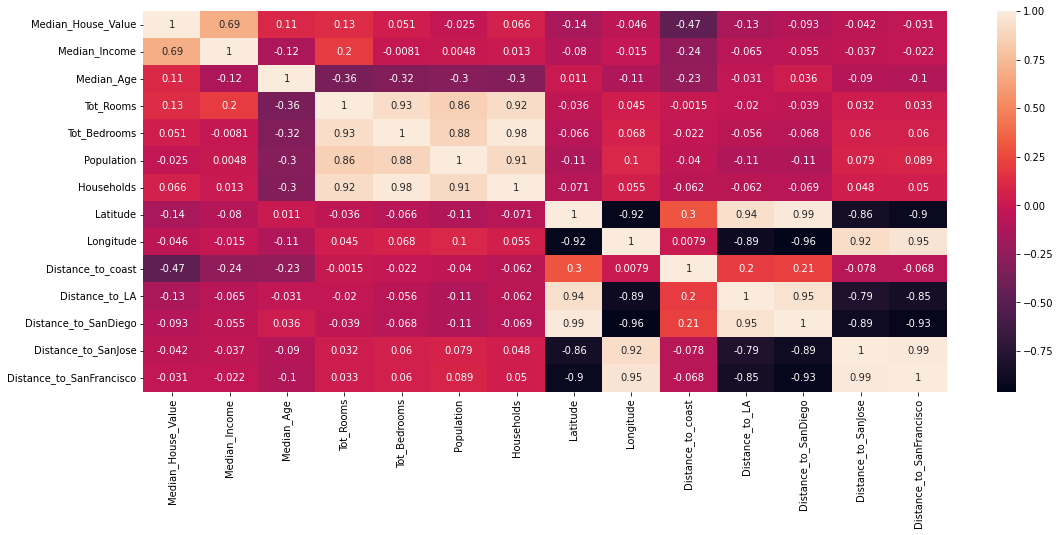

In [9]:
# Correlation
plt.figure(figsize = (18,7))
sns.heatmap(df.corr(),annot=True);

### Inference:
* Independent Features are highly correlated among themselves. (Multicollinearity present in the dataset in both +ve and -ve)
* Meanwhile the relationship between target and independent variables are not strong except for 'Median_Income' with +0.69.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


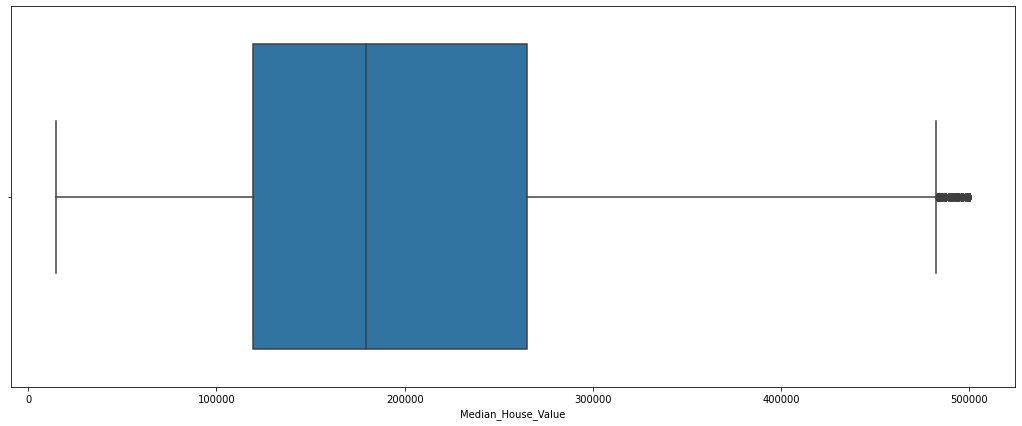

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


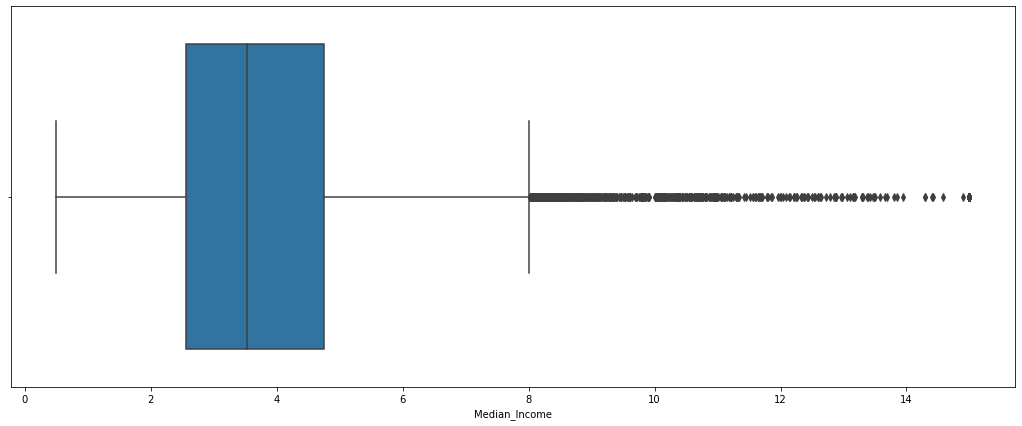

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


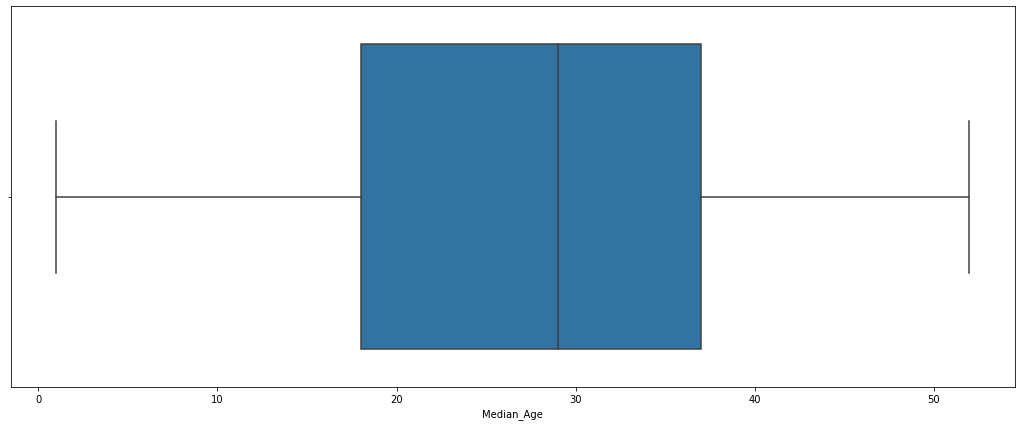

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


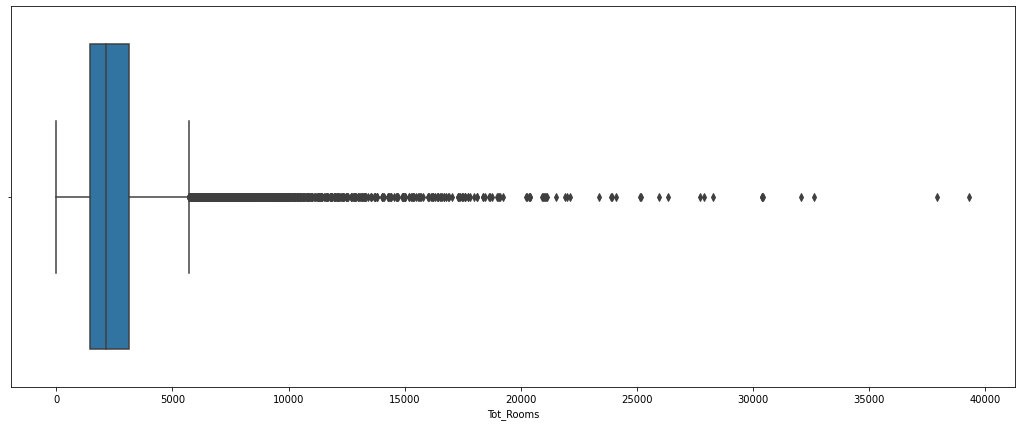

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


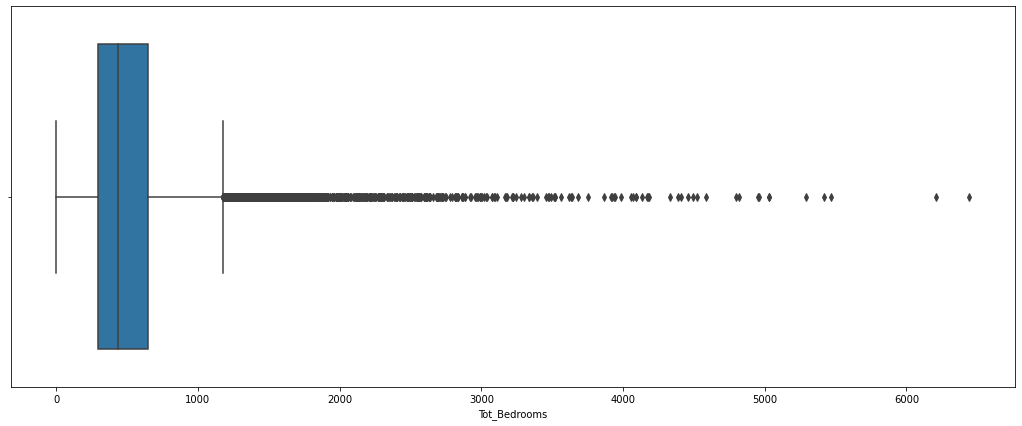

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


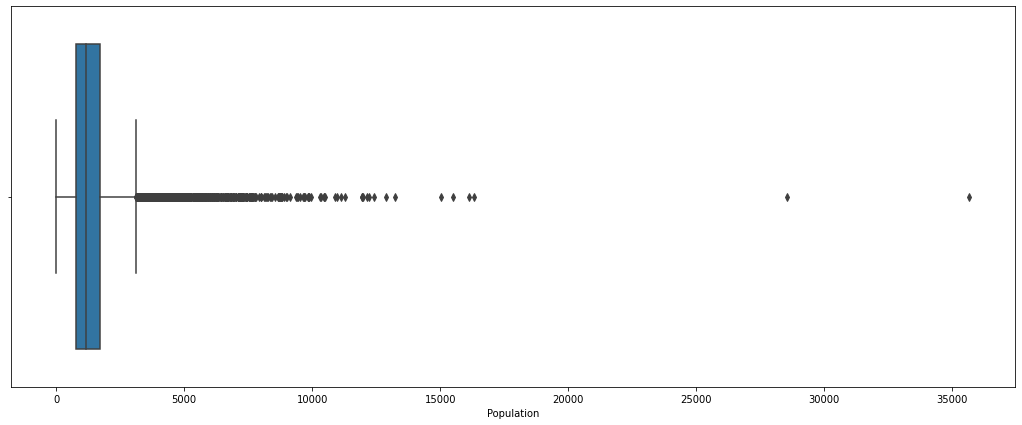

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


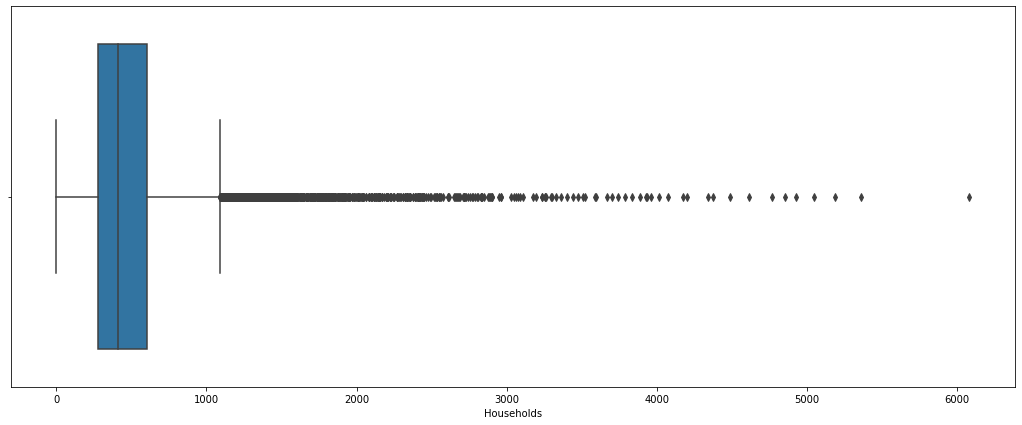

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


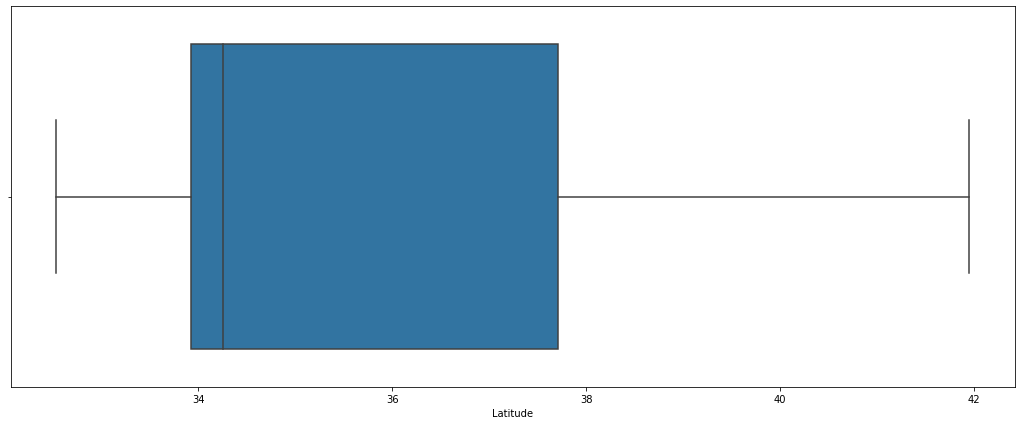

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


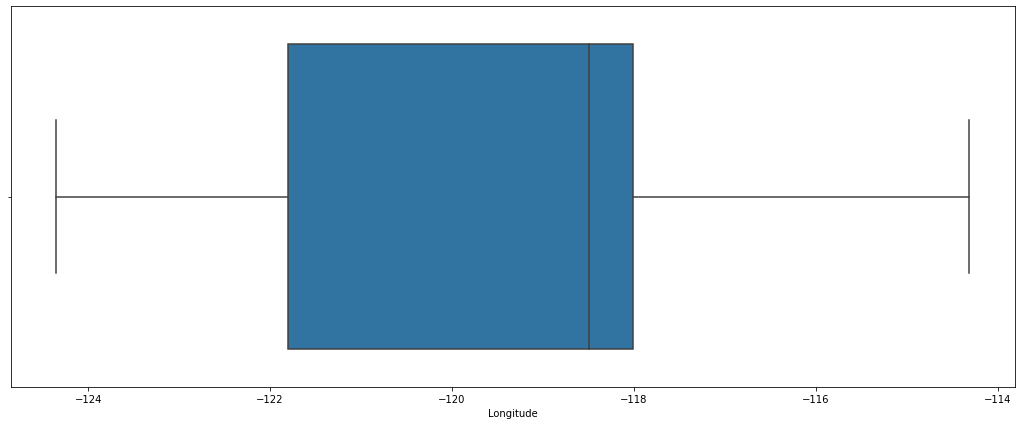

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


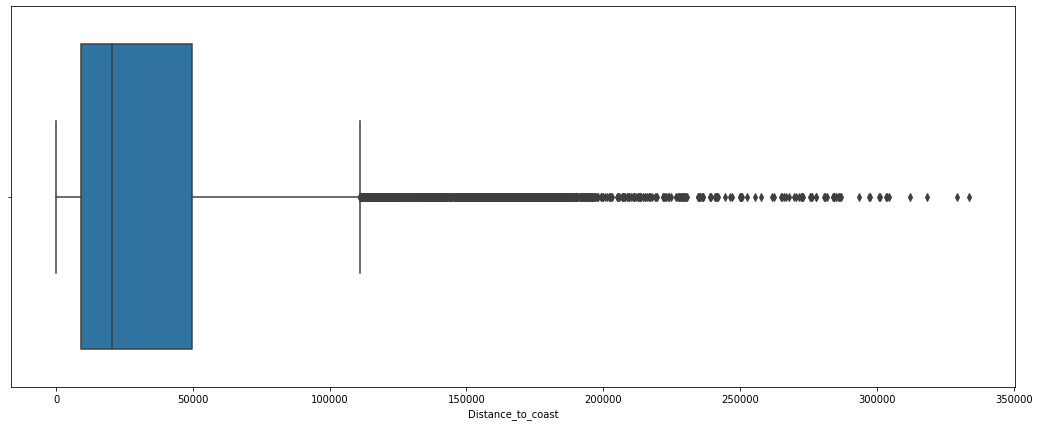

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


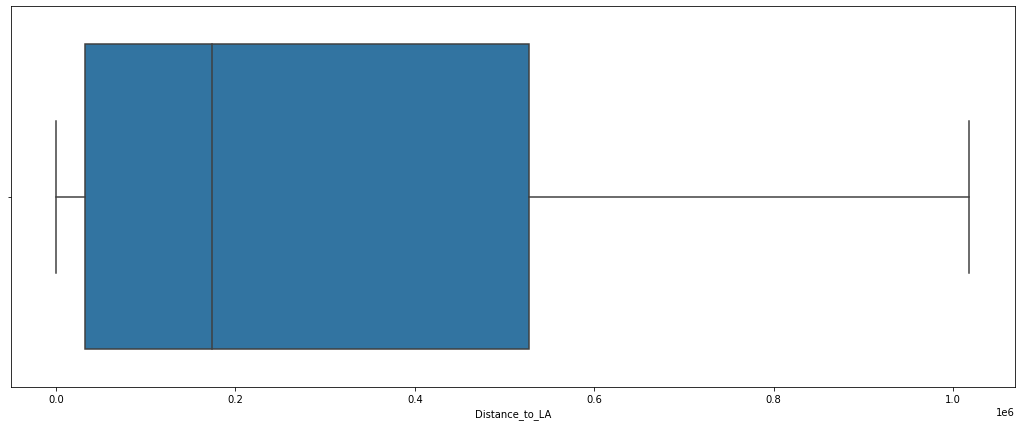

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


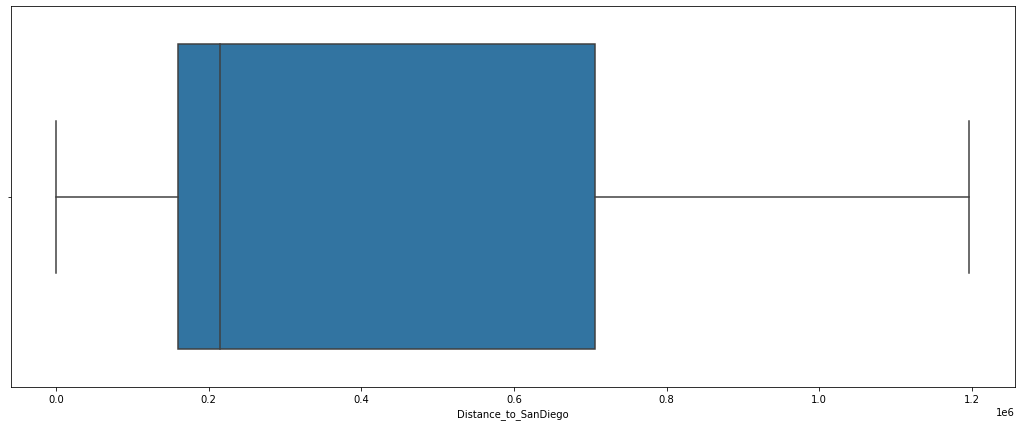

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


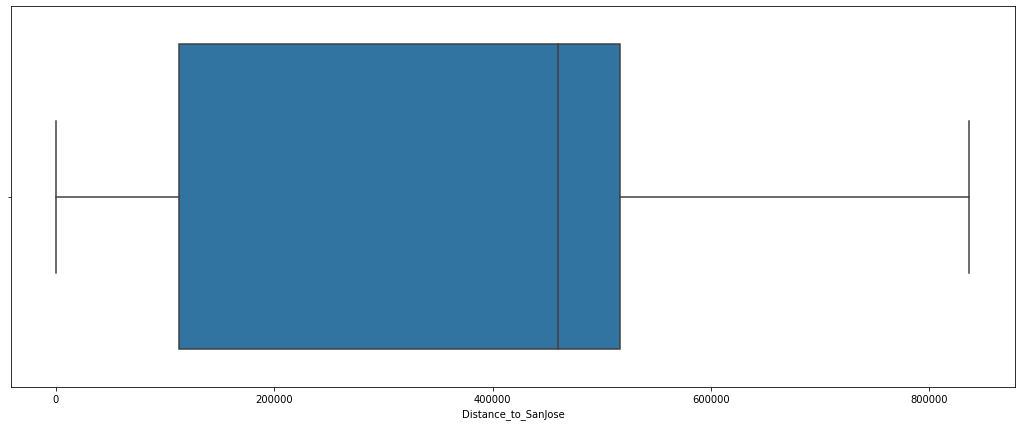

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


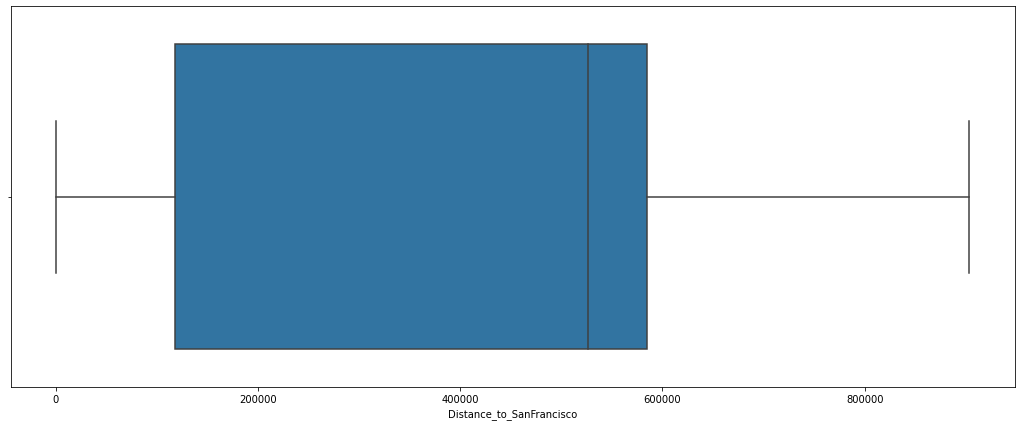

In [10]:
# Outliers

for i in df.columns:
  sns.boxplot(df[i])
  plt.show()

In [11]:
# some variables have extreme outliers

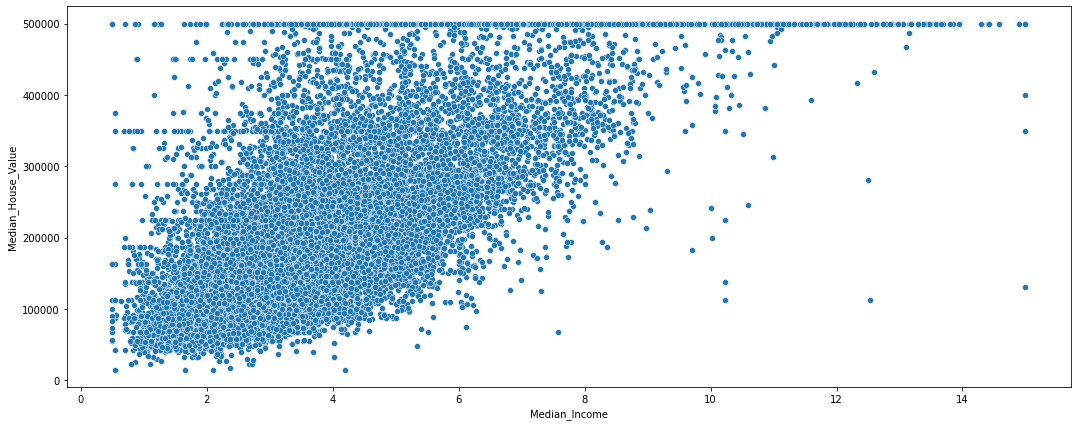

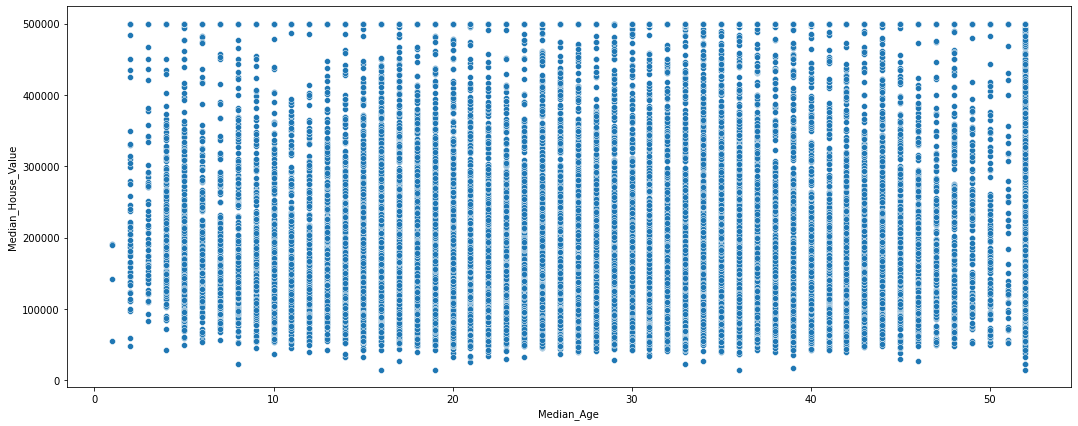

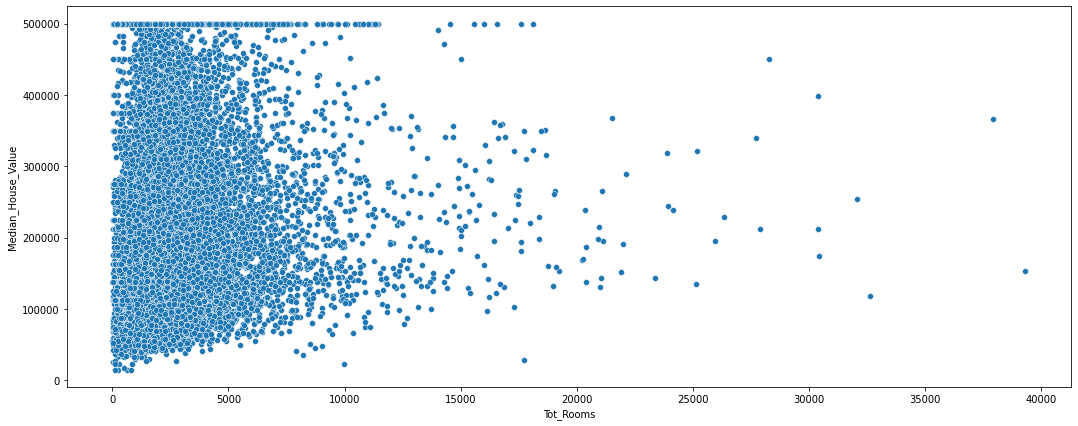

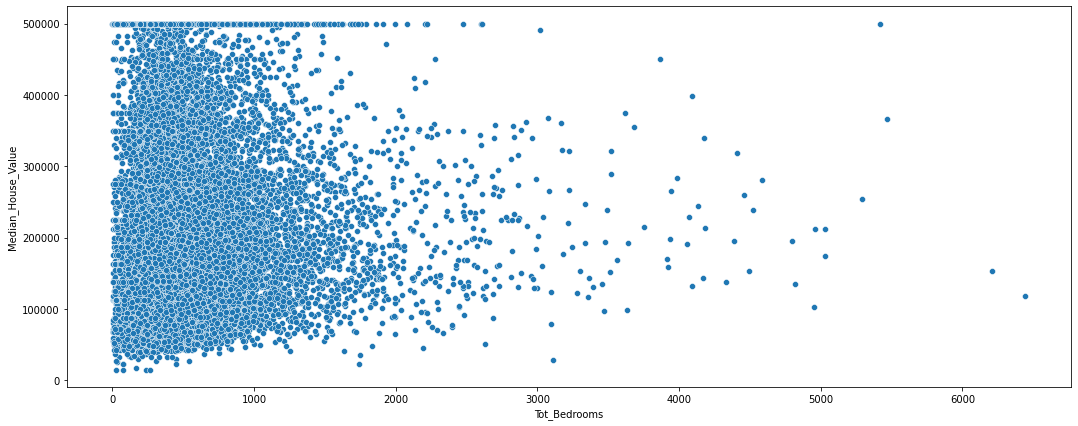

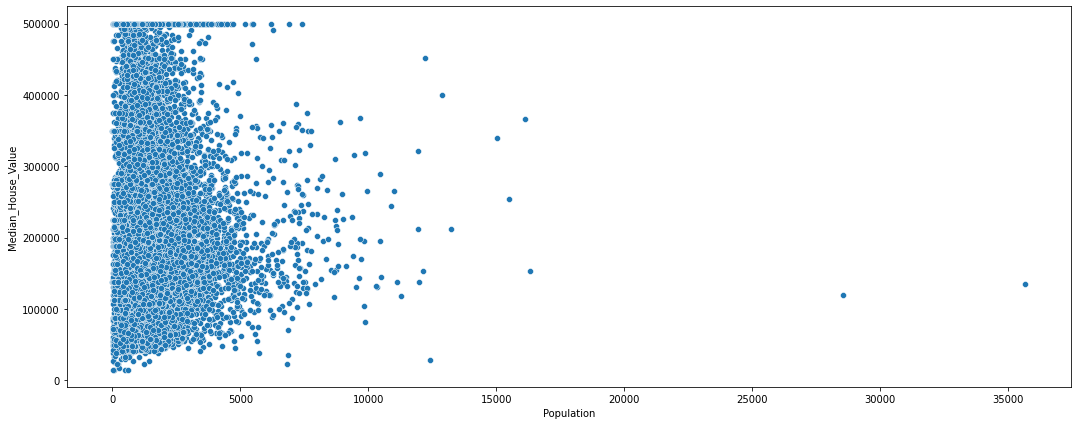

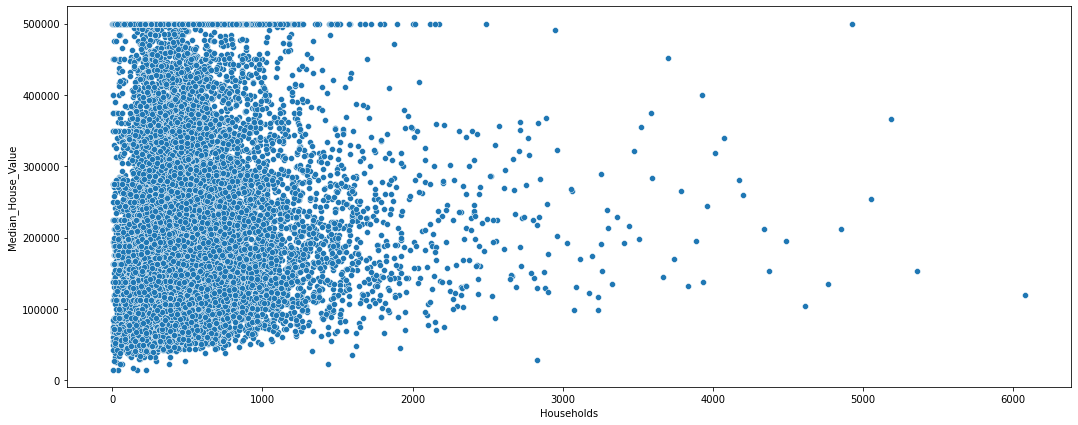

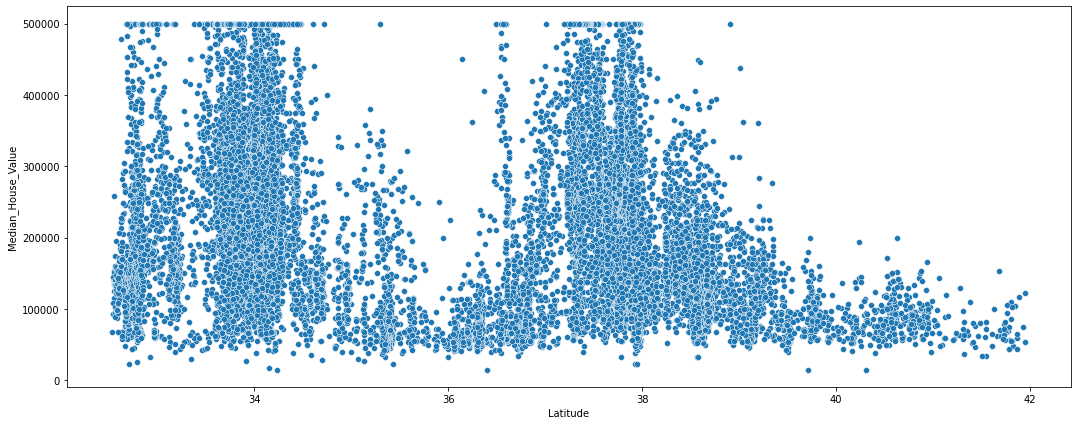

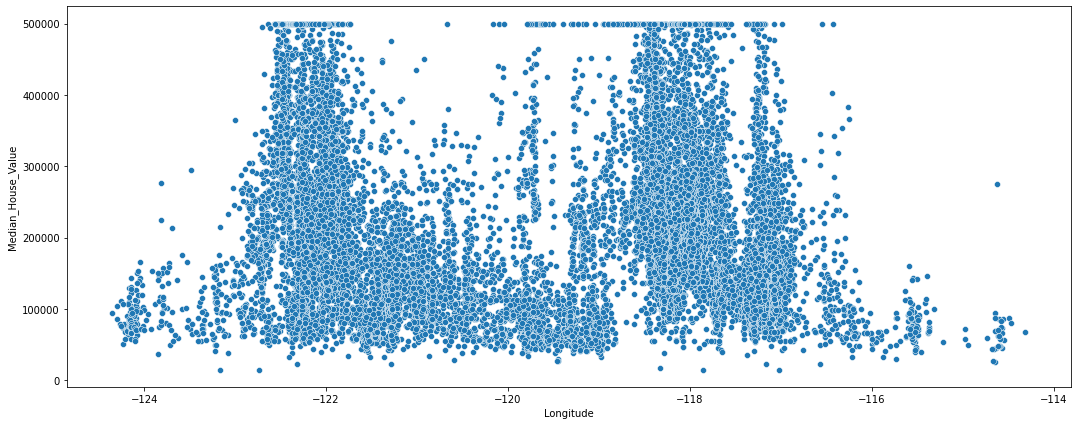

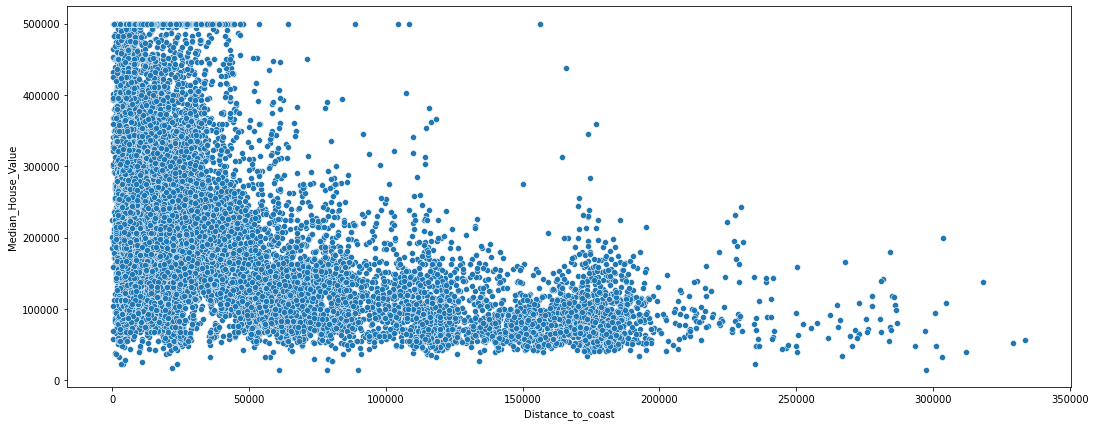

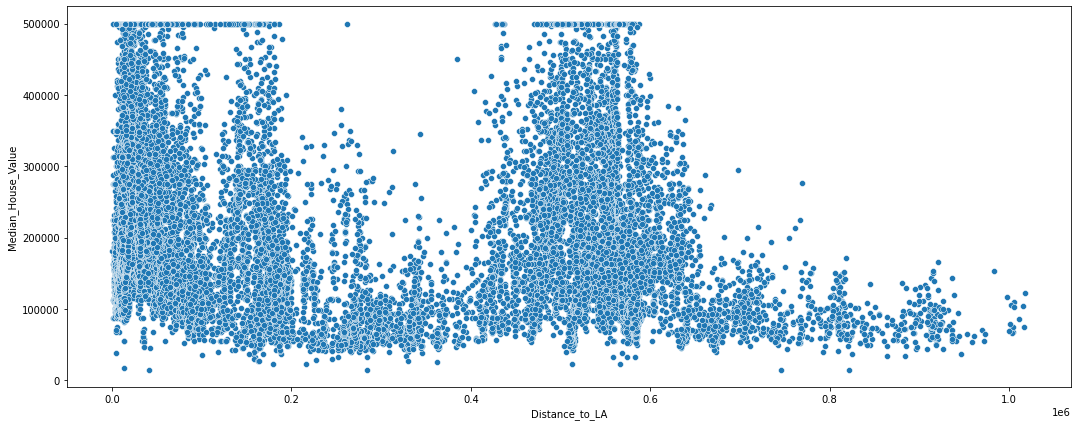

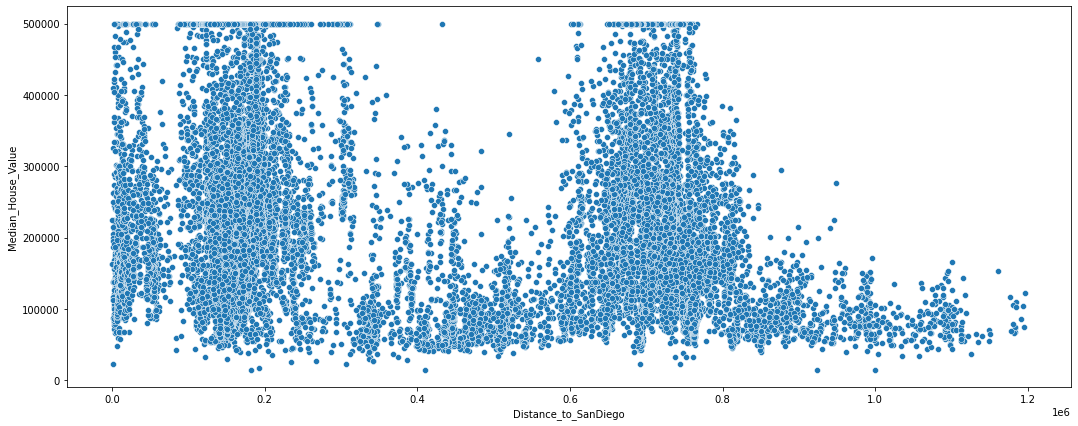

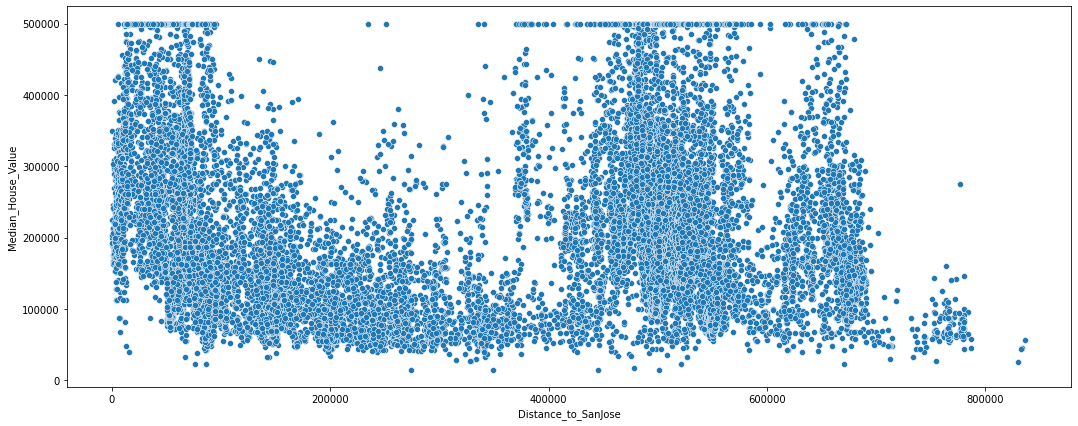

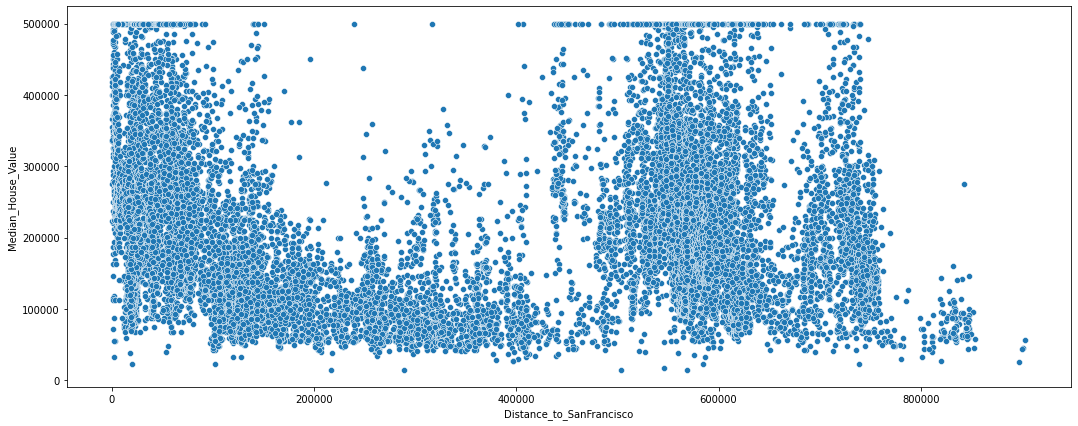

In [12]:
# Relationship between independent and target variable
for i in df.columns:
  for j in df.columns:
    if j == 'Median_House_Value' and i != 'Median_House_Value':
      sns.scatterplot(data= df , x = i ,y = j)
      plt.show()

In [13]:
# there is little to no relation between Target and independent variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


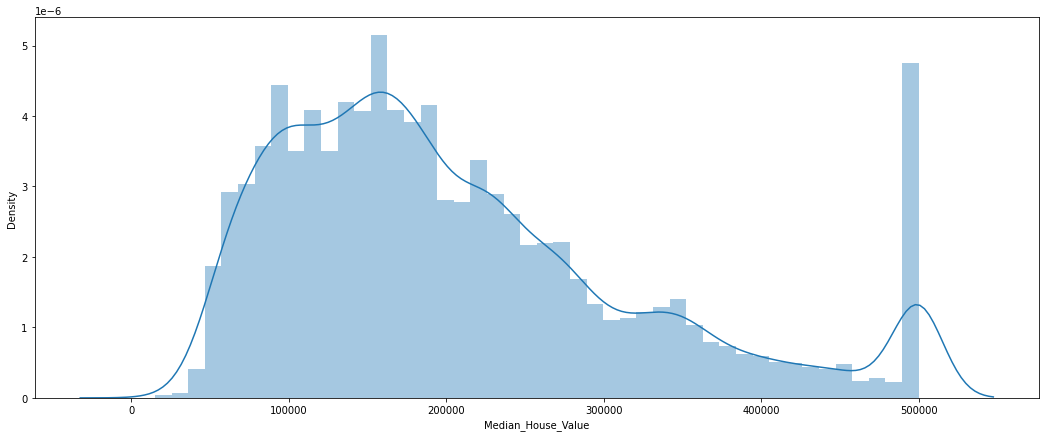

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


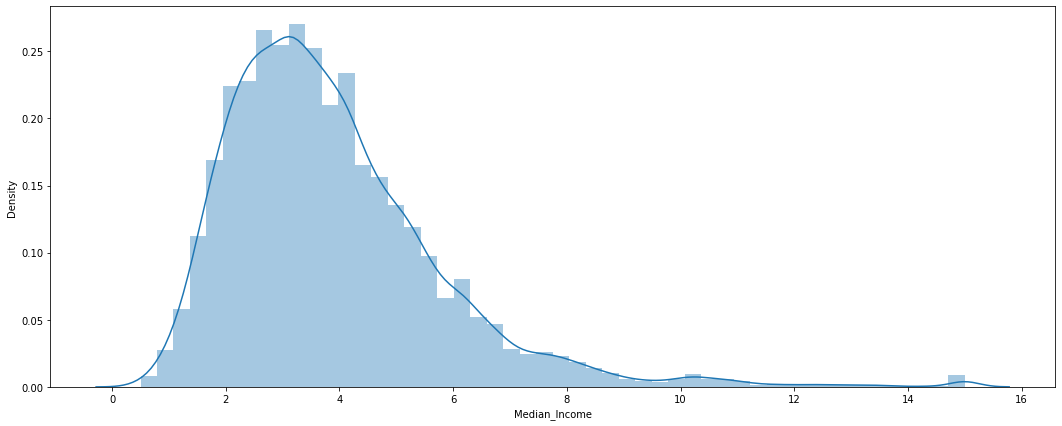

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


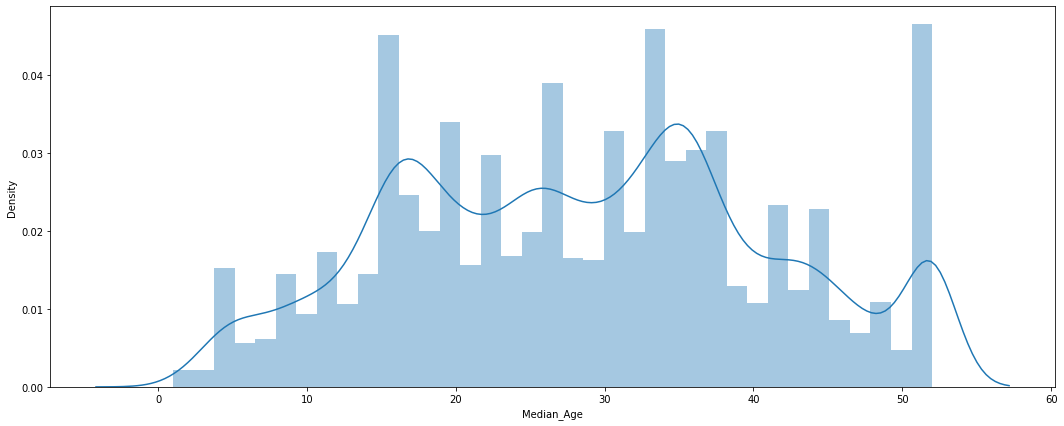

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


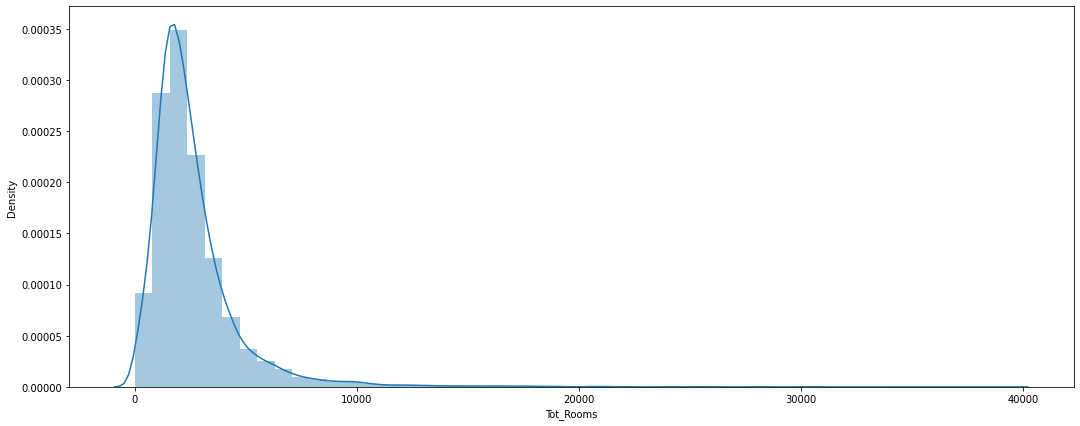

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


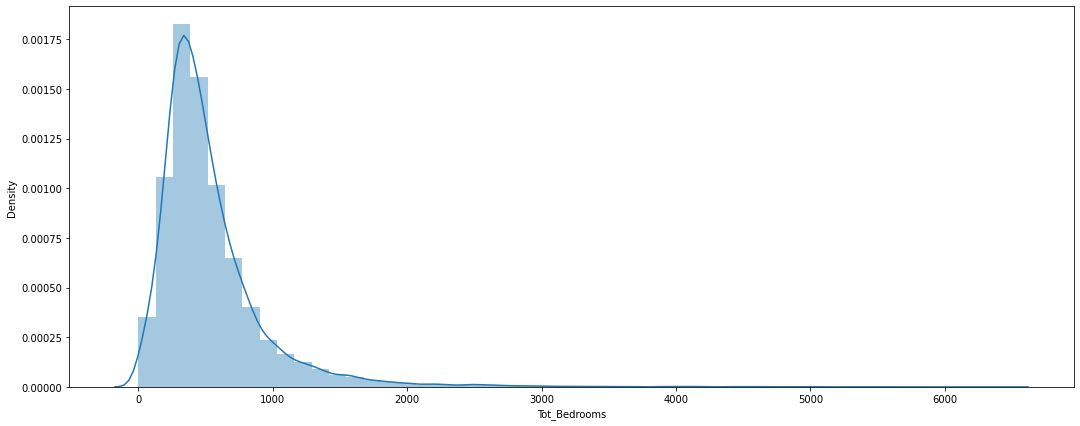

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


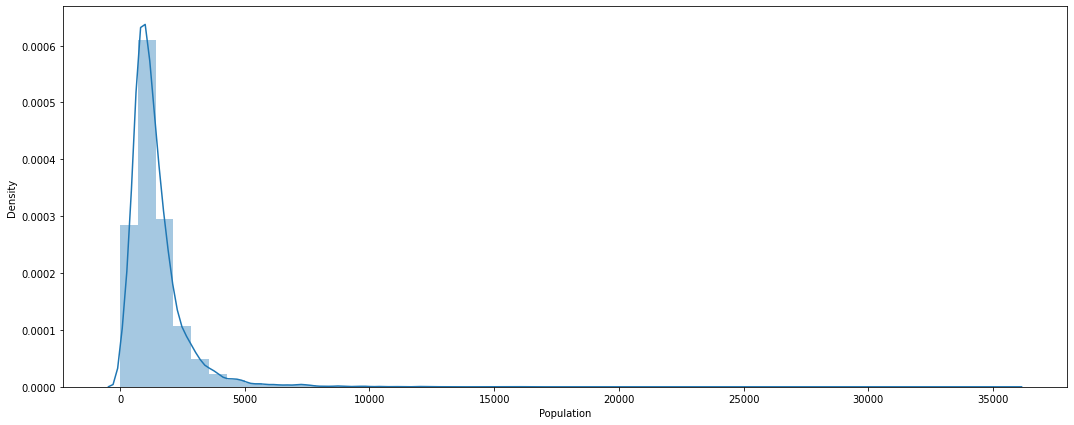

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


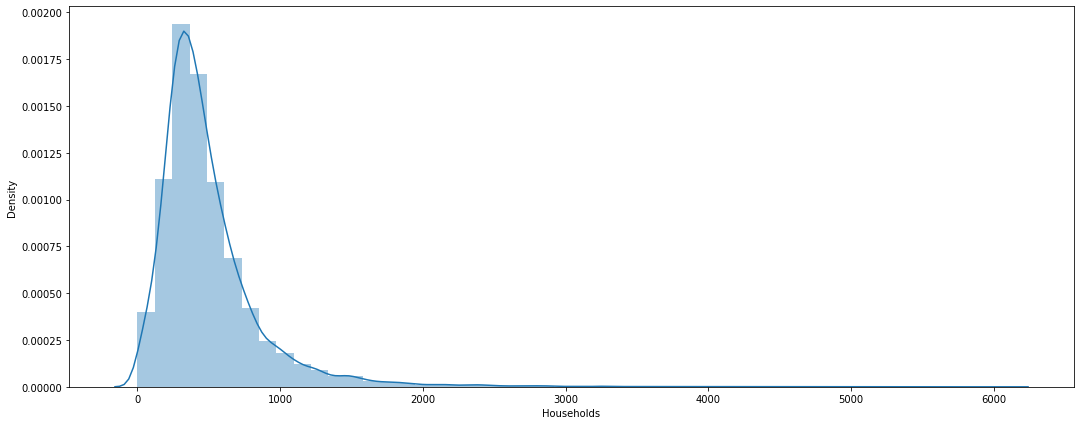

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


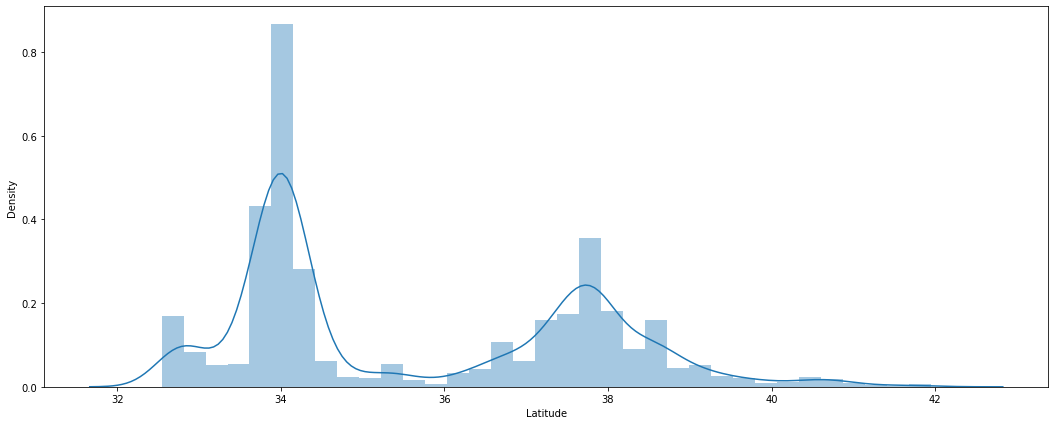

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


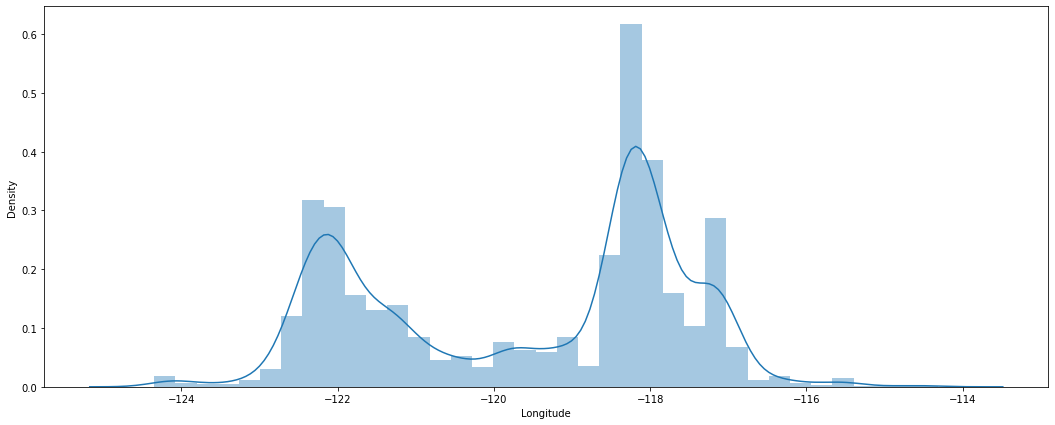

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


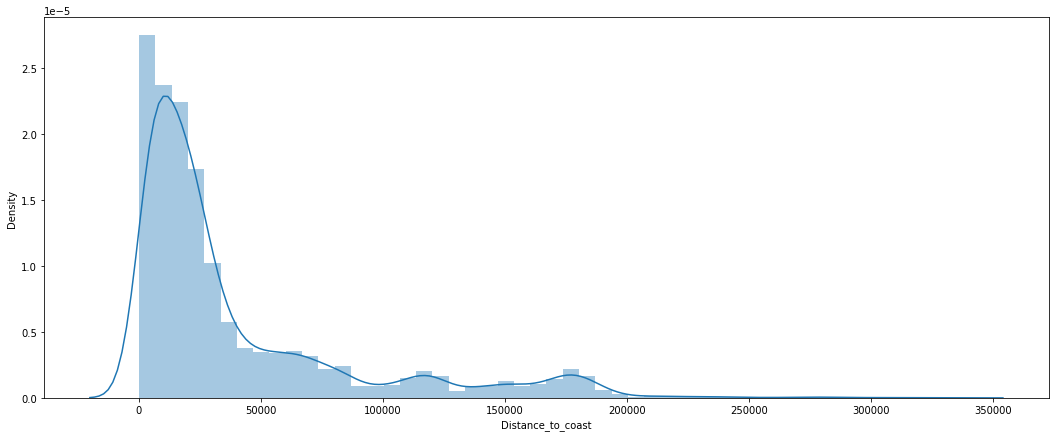

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


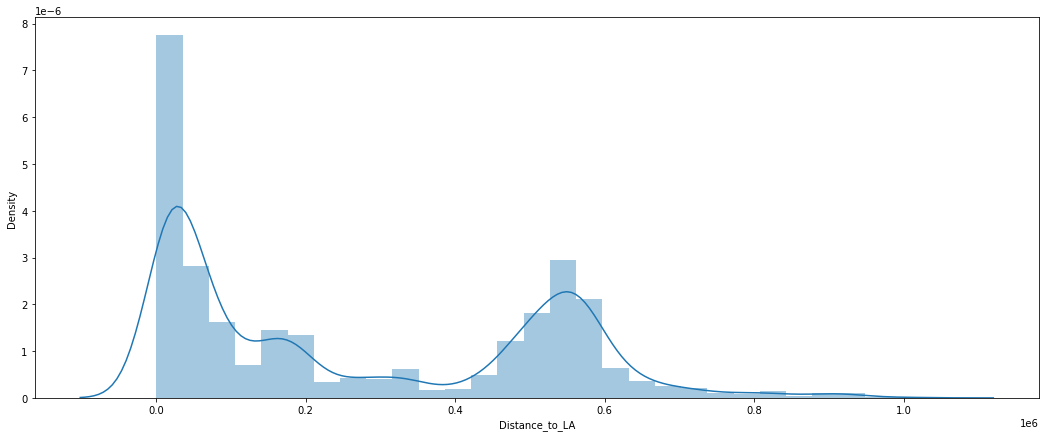

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


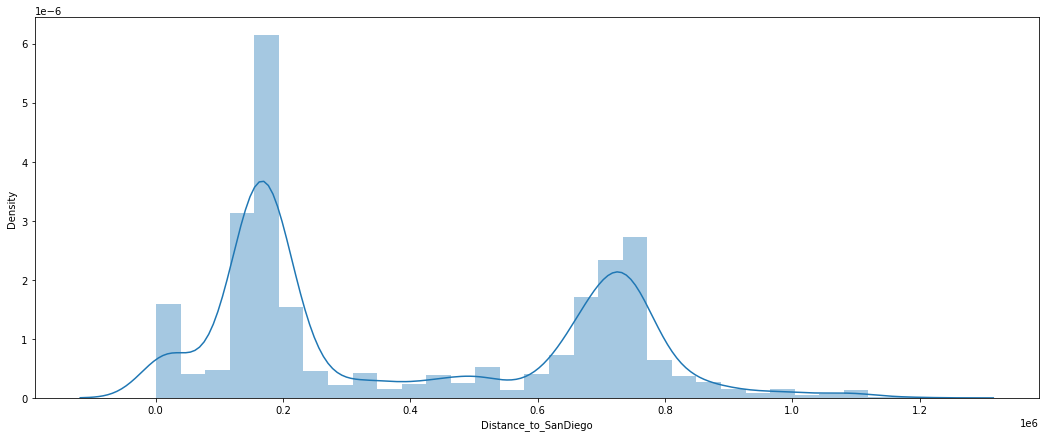

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


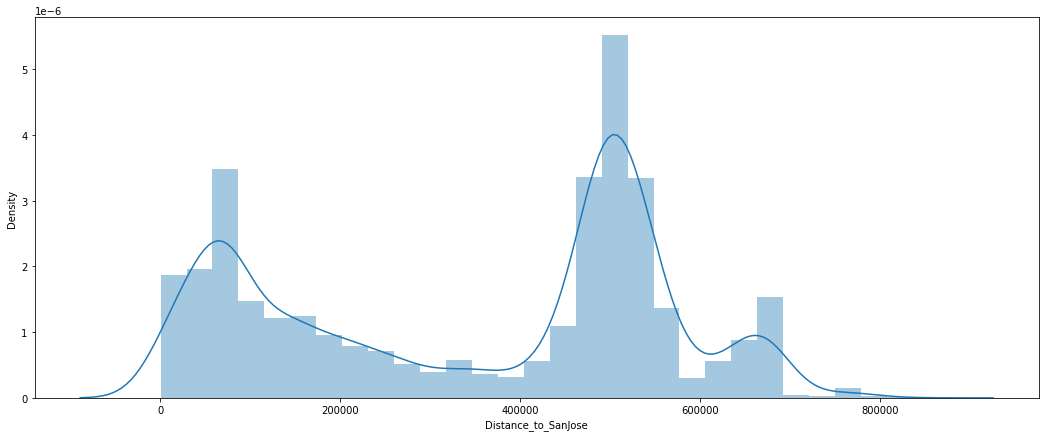

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


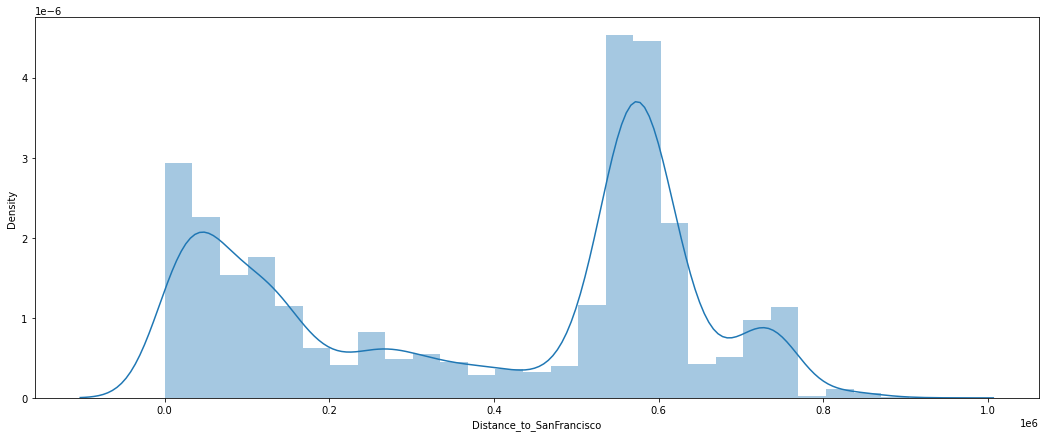

In [14]:
for i in df.columns :
  sns.distplot(df[i])
  plt.show()

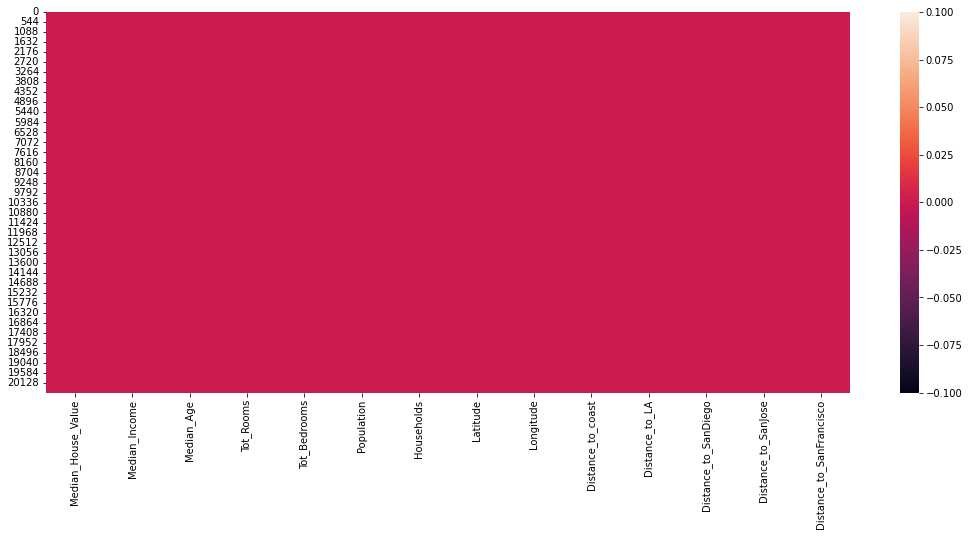

In [15]:
# Null values
sns.heatmap(df.isnull(),cbar=True)

In [16]:
# There are no null values

In [17]:
df = df.drop(columns = ['Latitude','Longitude'])

## Machine Learning  Part 1 - Linear Models

In [18]:
### Assumptions
# Independent and Target variables have a Linear Relationship
# Homoscedasticity : The varience of the residual is the same for any value of independent variables
# The Distribution of any X (Independent) and Y (Target) should be normal
# Observations of independent variables are independent of each other i.e., 
# there should be no multicollinearity
# the residuals should have no correlation of any kind i.e., autocorrelation must not be present

* Assumptions before Model building

In [19]:
# We already established the relationship of independent and target variable is not linear

In [20]:
# Normality Test
import scipy.stats as stats

In [21]:
### Shapiro test
x = df.drop(columns=['Median_House_Value'])
y = df['Median_House_Value']

In [22]:
# Ho : Data is normal
# Ha : Data is not normal

In [23]:
#Taking first 4000 values as sample for checking normality

shap_x = x.iloc[:3999]
shap_y = y.iloc[:3999]


In [24]:
tstat,pval = stats.shapiro(shap_x)
print(pval)

0.0


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [25]:
tstat,pval = stats.shapiro(shap_y)
print(pval)

7.006492321624085e-45


In [26]:
## Linear Modelling 
# OLS
df_linear = df.copy()
x = df_linear.drop(columns = ['Median_House_Value'])
y = df_linear['Median_House_Value']

In [27]:
xc = sm.add_constant(x)
ols = sm.OLS(y,xc).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:     Median_House_Value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     3270.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:45:09   Log-Likelihood:            -2.5945e+05
No. Observations:               20640   AIC:                         5.189e+05
Df Residuals:                   20628   BIC:                         5.190e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [28]:
## It is evident that multicollinearity is high
# Vif treatment for multicollinearity
x_vif = x.copy()
vif = pd.DataFrame()
vif['Features'] = x_vif.columns
vif['VIF'] = [variance_inflation_factor(x_vif.values,i) for i in range(len(x_vif.columns))]
vif.sort_values(by ='VIF',ascending=False)

Features         VIF
10  Distance_to_SanFrancisco  297.132396
9        Distance_to_SanJose  271.117312
5                 Households   95.019730
3               Tot_Bedrooms   94.182548
8       Distance_to_SanDiego   45.942748
2                  Tot_Rooms   31.023789
7             Distance_to_LA   30.239568
4                 Population   16.730497
0              Median_Income    8.094083
1                 Median_Age    6.996582
6          Distance_to_coast    2.657876

In [29]:
x_vif = x.drop(columns=['Distance_to_SanFrancisco'])
vif = pd.DataFrame()
vif['Features'] = x_vif.columns
vif['VIF'] = [variance_inflation_factor(x_vif.values,i) for i in range(len(x_vif.columns))]
vif.sort_values(by ='VIF',ascending=False)

Features        VIF
5            Households  95.019114
3          Tot_Bedrooms  93.744769
8  Distance_to_SanDiego  45.934735
2             Tot_Rooms  30.117981
7        Distance_to_LA  27.561001
4            Population  16.407096
0         Median_Income   7.130972
9   Distance_to_SanJose   6.994697
1            Median_Age   6.911562
6     Distance_to_coast   2.320029

In [30]:
x_vif = x.drop(columns=['Distance_to_SanFrancisco','Households'])
vif = pd.DataFrame()
vif['Features'] = x_vif.columns
vif['VIF'] = [variance_inflation_factor(x_vif.values,i) for i in range(len(x_vif.columns))]
vif.sort_values(by ='VIF',ascending=False)

Features        VIF
7  Distance_to_SanDiego  45.921390
3          Tot_Bedrooms  30.204321
2             Tot_Rooms  30.025521
6        Distance_to_LA  27.558506
4            Population  12.409828
0         Median_Income   7.063902
8   Distance_to_SanJose   6.976798
1            Median_Age   6.898242
5     Distance_to_coast   2.264728

In [31]:
x_vif = x.drop(columns=['Distance_to_SanFrancisco','Households','Distance_to_SanDiego'])
vif = pd.DataFrame()
vif['Features'] = x_vif.columns
vif['VIF'] = [variance_inflation_factor(x_vif.values,i) for i in range(len(x_vif.columns))]
vif.sort_values(by ='VIF',ascending=False)

Features        VIF
3         Tot_Bedrooms  28.856771
2            Tot_Rooms  28.329818
4           Population  12.102319
0        Median_Income   5.904831
7  Distance_to_SanJose   5.113918
1           Median_Age   5.019704
6       Distance_to_LA   3.542719
5    Distance_to_coast   1.886401

In [32]:
x_vif = x.drop(columns=['Distance_to_SanFrancisco','Households','Distance_to_SanDiego','Tot_Bedrooms'])
vif = pd.DataFrame()
vif['Features'] = x_vif.columns
vif['VIF'] = [variance_inflation_factor(x_vif.values,i) for i in range(len(x_vif.columns))]
vif.sort_values(by ='VIF',ascending=False)

Features        VIF
2            Tot_Rooms  11.540061
3           Population  10.578481
0        Median_Income   4.888351
1           Median_Age   4.860323
6  Distance_to_SanJose   4.831298
5       Distance_to_LA   3.442247
4    Distance_to_coast   1.870497

In [33]:
x_vif = x.drop(columns=['Distance_to_SanFrancisco','Households','Distance_to_SanDiego','Tot_Bedrooms','Tot_Rooms'])
vif = pd.DataFrame()
vif['Features'] = x_vif.columns
vif['VIF'] = [variance_inflation_factor(x_vif.values,i) for i in range(len(x_vif.columns))]
vif.sort_values(by ='VIF',ascending=False)

Features       VIF
5  Distance_to_SanJose  4.831293
1           Median_Age  4.499331
0        Median_Income  4.171983
4       Distance_to_LA  3.402740
2           Population  2.440717
3    Distance_to_coast  1.864372

In [34]:
vif['Features'].values

array(['Median_Income', 'Median_Age', 'Population', 'Distance_to_coast',
       'Distance_to_LA', 'Distance_to_SanJose'], dtype=object)

In [35]:
x_vif = x[['Median_Income', 'Median_Age', 'Population', 'Distance_to_coast',
       'Distance_to_LA', 'Distance_to_SanJose']]

In [36]:
xc_vif = sm.add_constant(x_vif)
model_ols_1 = sm.OLS(y,xc_vif).fit()
print(model_ols_1.summary())

                            OLS Regression Results                            
Dep. Variable:     Median_House_Value   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     4987.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:45:10   Log-Likelihood:            -2.6062e+05
No. Observations:               20640   AIC:                         5.213e+05
Df Residuals:                   20633   BIC:                         5.213e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.169e+05   3

In [37]:
#Even after Vif treatment there is not much infact R-squared became worse after vif, hence we have to move on without
# satisfying multicollinearity assumption

In [38]:
stats.levene(df_linear['Distance_to_LA'],df_linear['Distance_to_coast'])

LeveneResult(statistic=29293.7266740623, pvalue=0.0)

In [39]:
resid = ols.resid

In [40]:
ypred = ols.predict(xc)

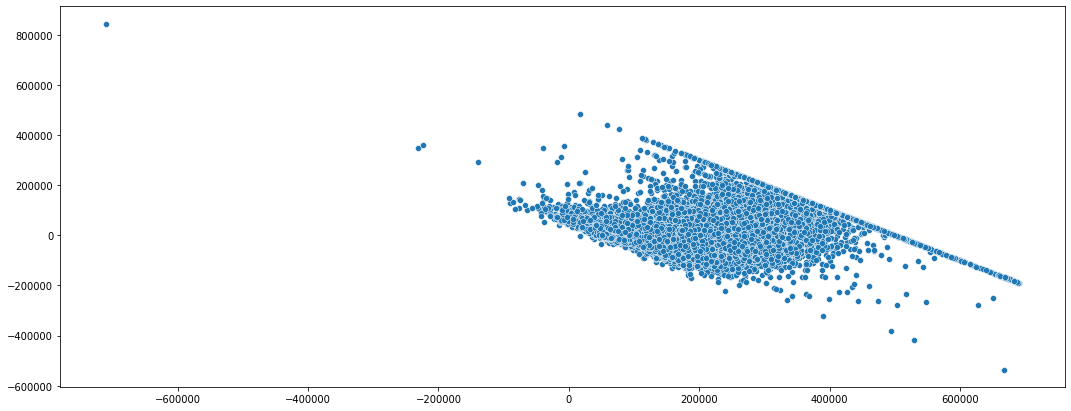

In [41]:
sns.scatterplot(x = ypred , y = resid)

In [42]:
## Inference
# Most assumptions are not satisfying , hence we can't move forward with linear models

## Non-Linear Models

In [43]:
df.head()

Median_House_Value  ...  Distance_to_SanFrancisco
0            452600.0  ...              21250.213767
1            358500.0  ...              20880.600400
2            352100.0  ...              18811.487450
3            341300.0  ...              18031.047568
4            342200.0  ...              18031.047568

[5 rows x 12 columns]

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor,GradientBoostingRegressor,StackingRegressor,BaggingRegressor,VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split , GridSearchCV,KFold,cross_val_score

In [45]:
x = df.drop(columns=['Median_House_Value'])
y = df['Median_House_Value']

In [46]:
x_scaled = x.copy(deep = True)
x_scaled = x_scaled.apply(stats.zscore)

In [47]:
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,y , test_size = 0.3 , random_state = 7)

In [48]:
knn = KNeighborsRegressor()
params = {'n_neighbors':np.arange(1,20),
          'weights':['uniform','distance'],'metric':['chebyshev','euclidean','manhattan']}
k = KFold(n_splits= 5 , shuffle=True , random_state= 7)
grid = GridSearchCV(estimator=knn,param_grid=params,cv = k , scoring='neg_root_mean_squared_error',n_jobs=-1)
grid.fit(xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['chebyshev', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [49]:
grid.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='distance')

In [50]:
knn = KNeighborsRegressor(**grid.best_params_)
model_knn = knn.fit(xtrain,ytrain)
        

In [51]:
y_train_pred = model_knn.predict(xtrain)

In [52]:
r2_knn_train = metrics.r2_score(ytrain,y_train_pred)
r2_knn_train

1.0

In [53]:
rmse_knn_train = np.sqrt(metrics.mean_squared_error(ytrain,y_train_pred))
rmse_knn_train

0.0

In [54]:
y_test_pred = model_knn.predict(xtest)

In [55]:
r2_knn_test = metrics.r2_score(ytest,y_test_pred)
r2_knn_test

0.7575097904102314

In [56]:
rmse_knn_test = np.sqrt(metrics.mean_squared_error(ytest,y_test_pred))
rmse_knn_test

56915.57129445127

In [57]:
# cross validation
cv = cross_val_score(estimator=knn , X = x_scaled , y = y , cv = k , scoring= 'neg_root_mean_squared_error')
cv_knn = np.abs(cv)
cv_knn

array([57420.80805073, 56683.5007622 , 55363.71608756, 56126.7629864 ,
       55627.64234062])

In [58]:
rmse_knn = np.mean(cv_knn)     # Bias Error
rmse_knn

56244.486045500125

In [59]:
rmse_knn_std = np.std(cv_knn,ddof = 1)  # Variance Error
rmse_knn_std

828.6401473442055

In [60]:
# cross validation
cv = cross_val_score(estimator=knn , X = x_scaled , y = y , cv = k , scoring= 'r2')
cv_knn = np.abs(cv)
cv_knn

array([0.7548618 , 0.7602812 , 0.76569896, 0.76313755, 0.76772037])

In [61]:
r2_knn = np.mean(cv_knn)
r2_knn

0.7623399769681944

In [62]:
r2_knn_std = np.std(cv_knn,ddof = 1)
r2_knn_std

0.005025664180212737

# Decision Tree Regressor

In [63]:
dt = DecisionTreeRegressor()
params = {'criterion':['mse','friedman_mse'],
          'max_depth': np.arange(1,12),'max_features': ['auto', 'sqrt', 'log2'] }
grid = GridSearchCV(estimator=dt , param_grid=params,scoring='neg_root_mean_squared_error',cv=k,n_jobs=-1)
grid.fit(xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth

In [64]:
grid.best_params_

{'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto'}

In [65]:
dt = DecisionTreeRegressor(**grid.best_params_)
model_dt = dt.fit(xtrain,ytrain)

In [66]:
y_train_pred = model_dt.predict(xtrain)

In [67]:
r2_dt_train = metrics.r2_score(ytrain,y_train_pred)
r2_dt_train

0.7749267313116146

In [68]:
rmse_dt_train = np.sqrt(metrics.mean_squared_error(ytrain,y_train_pred))
rmse_dt_train

54702.018383105125

In [69]:
y_test_pred = model_dt.predict(xtest)

In [70]:
r2_dt_test = metrics.r2_score(ytest,y_test_pred)
r2_dt_test

0.7070354121598181

In [71]:
rmse_dt_test = np.sqrt(metrics.mean_squared_error(ytest,y_test_pred))
rmse_dt_test

62559.25368548683

In [72]:
# cross validation
cv = cross_val_score(estimator=dt , X = x_scaled , y = y , cv = k , scoring= 'neg_root_mean_squared_error')
cv_dt = np.abs(cv)
cv_dt

array([62669.70440317, 62688.7412915 , 59169.17623424, 62520.81559433,
       60752.93337608])

In [73]:
rmse_dt= np.mean(cv_dt)     # Bias Error
rmse_dt

61560.27417986547

In [74]:
rmse_dt_std = np.std(cv_dt,ddof = 1)  # Variance Error
rmse_dt_std

1564.9330505122737

In [75]:
# cross validation
cv = cross_val_score(estimator=dt , X = x_scaled , y = y , cv = k , scoring= 'r2')
cv_dt = np.abs(cv)
cv_dt

array([0.70763399, 0.70694075, 0.73352979, 0.71135242, 0.72340096])

In [76]:
r2_dt = np.mean(cv_dt)
r2_dt

0.7165715795991614

In [77]:
r2_dt_std = np.std(cv_dt,ddof = 1)
r2_dt_std

0.011555239952852561

## Random Forest Regressor

In [78]:
rf = RandomForestRegressor(random_state=7)
params = {'n_estimators':np.arange(100,250,40),
          'max_depth': np.arange(1,12)}
grid = GridSearchCV(estimator=rf,param_grid=params,scoring='neg_root_mean_squared_error',cv=k,n_jobs=-1)
grid.fit(xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=7,
                                             verbose=0

In [79]:
grid.best_params_

{'max_depth': 11, 'n_estimators': 220}

In [80]:
rf = RandomForestRegressor(**grid.best_params_,random_state=7)
model_rf = rf.fit(xtrain,ytrain)

In [81]:
y_train_pred = model_rf.predict(xtrain)

In [82]:
r2_rf_train = metrics.r2_score(ytrain,y_train_pred)
r2_rf_train

0.8923390653426072

In [83]:
rmse_rf_train = np.sqrt(metrics.mean_squared_error(ytrain,y_train_pred))
rmse_rf_train

37832.97252088861

In [84]:
y_test_pred = model_rf.predict(xtest)

In [85]:
r2_rf_test = metrics.r2_score(ytest,y_test_pred)
r2_rf_test

0.7906197342237551

In [86]:
rmse_rf_test = np.sqrt(metrics.mean_squared_error(ytest,y_test_pred))
rmse_rf_test

52887.35752708043

In [87]:
# cross validation
cv = cross_val_score(estimator=rf , X = x_scaled , y = y , cv = k , scoring= 'neg_root_mean_squared_error')
cv_rf = np.abs(cv)
cv_rf

array([53224.37662872, 52553.91887783, 50175.5332178 , 52421.97327878,
       51527.39780637])

In [88]:
rmse_rf= np.mean(cv_rf)     # Bias Error
rmse_rf

51980.63996189982

In [89]:
rmse_rf_std = np.std(cv_rf,ddof = 1)  # Variance Error
rmse_rf_std

1176.2380198744295

In [90]:
# cross validation
cv = cross_val_score(estimator=rf , X = x_scaled , y = y , cv = k , scoring= 'r2')
cv_rf = np.abs(cv)
cv_rf

array([0.78938293, 0.79393749, 0.80755451, 0.79337496, 0.80070049])

In [91]:
r2_rf = np.mean(cv_rf)
r2_rf

0.7969900763442407

In [92]:
r2_rf_std = np.std(cv_rf,ddof = 1)
r2_rf_std

0.007169907916989344

## Adaptive Boost

In [93]:
ada = AdaBoostRegressor(base_estimator =dt , random_state=7)
model_ada = ada.fit(xtrain,ytrain)

In [94]:
y_train_pred = model_ada.predict(xtrain)

In [95]:
r2_ada_train = metrics.r2_score(ytrain,y_train_pred)
r2_ada_train

0.8196962128823388

In [96]:
rmse_ada_train = np.sqrt(metrics.mean_squared_error(ytrain,y_train_pred))
rmse_ada_train

48960.27138810216

In [97]:
y_test_pred = model_ada.predict(xtest)

In [98]:
r2_ada_test = metrics.r2_score(ytest,y_test_pred)
r2_ada_test

0.7423452887238888

In [99]:
rmse_ada_test = np.sqrt(metrics.mean_squared_error(ytest,y_test_pred))
rmse_ada_test

58668.237179867734

In [100]:
# cross validation
cv = cross_val_score(estimator=ada , X = x_scaled , y = y , cv = k , scoring= 'neg_root_mean_squared_error')
cv_ada = np.abs(cv)
cv_ada

array([59537.73790972, 59648.75936805, 59020.91359954, 60515.25095471,
       58678.06075704])

In [101]:
rmse_ada= np.mean(cv_ada)     # Bias Error
rmse_ada

59480.14451781049

In [102]:
rmse_ada_std = np.std(cv_ada,ddof = 1)  # Variance Error
rmse_ada_std

699.5399734520068

In [241]:
# cross validation
cv = cross_val_score(estimator=ada , X = x_scaled , y = y , cv = k , scoring= 'r2')
cv_ada = np.abs(cv)
cv_ada

array([0.73645362, 0.73454458, 0.73372181, 0.72464948, 0.74154715])

In [242]:
r2_ada = np.mean(cv_ada)
r2_ada

0.7341833282088517

In [243]:
r2_ada_std = np.std(cv_ada,ddof = 1)
r2_ada_std

0.006136324226781346

# Gradient Boosting

In [244]:
gb = GradientBoostingRegressor(random_state=7)
model_gb = gb.fit(xtrain,ytrain)

In [245]:
y_train_pred = model_gb.predict(xtrain)

In [246]:
r2_gb_train = metrics.r2_score(ytrain,y_train_pred)
r2_gb_train

0.7956939877635072

In [247]:
rmse_gb_train = np.sqrt(metrics.mean_squared_error(ytrain,y_train_pred))
rmse_gb_train

52117.30685501433

In [248]:
y_test_pred = model_gb.predict(xtest)

In [249]:
r2_gb_test = metrics.r2_score(ytest,y_test_pred)
r2_gb_test

0.7696826078168463

In [250]:
rmse_gb_test = np.sqrt(metrics.mean_squared_error(ytest,y_test_pred))
rmse_gb_test

55468.620134283

In [251]:
# cross validation
cv = cross_val_score(estimator=gb , X = x_scaled , y = y , cv = k , scoring= 'neg_root_mean_squared_error')
cv_gb= np.abs(cv)
cv_gb

array([55665.86798698, 56190.73237026, 53314.80118185, 55052.46033084,
       54636.36229963])

In [252]:
rmse_gb= np.mean(cv_gb)     # Bias Error
rmse_gb

54972.0448339103

In [253]:
rmse_gb_std = np.std(cv_gb,ddof = 1)  # Variance Error
rmse_gb_std

1099.1128032723448

In [254]:
# cross validation
cv = cross_val_score(estimator=gb , X = x_scaled , y = y , cv = k , scoring= 'r2')
cv_gb = np.abs(cv)
cv_gb

array([0.76961704, 0.76443099, 0.78272021, 0.77211818, 0.77592502])

In [255]:
r2_gb = np.mean(cv_gb)
r2_gb

0.7729622861923134

In [256]:
r2_gb_std = np.std(cv_gb,ddof = 1)
r2_gb_std

0.006868060340093219

## XGBoostRegressor

In [257]:
xgb = XGBRegressor()
params = {'max_depth': np.arange(1,12)}
grid = GridSearchCV(estimator=xgb,param_grid=params,scoring='neg_root_mean_squared_error',cv=k,n_jobs=-1)
grid.fit(xtrain,ytrain)

[17:32:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8

In [258]:
grid.best_params_

{'max_depth': 8}

In [259]:
xgb = XGBRegressor(**grid.best_params_)
model_xgb = xgb.fit(xtrain,ytrain)

[17:32:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [260]:
y_train_pred = model_xgb.predict(xtrain)

In [261]:
r2_xgb_train = metrics.r2_score(ytrain,y_train_pred)
r2_xgb_train

0.946176518982816

In [262]:
rmse_xgb_train = np.sqrt(metrics.mean_squared_error(ytrain,y_train_pred))
rmse_xgb_train

26750.215383435512

In [263]:
y_test_pred = model_gb.predict(xtest)

In [264]:
r2_xgb_test = metrics.r2_score(ytest,y_test_pred)
r2_xgb_test

0.7696826078168463

In [265]:
rmse_xgb_test = np.sqrt(metrics.mean_squared_error(ytest,y_test_pred))
rmse_xgb_test

55468.620134283

In [266]:
# cross validation
cv = cross_val_score(estimator=xgb , X = x_scaled , y = y , cv = k , scoring= 'neg_root_mean_squared_error')
cv_xgb= np.abs(cv)
cv_xgb

[17:32:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([48880.86889217, 48196.07265943, 46444.50825067, 47937.44068304,
       46706.09580439])

In [267]:
rmse_xgb= np.mean(cv_xgb)     # Bias Error
rmse_xgb

47632.99725793809

In [268]:
rmse_xgb_std = np.std(cv_xgb,ddof = 1)  # Variance Error
rmse_xgb_std

1029.3900800194103

In [269]:
# cross validation
cv = cross_val_score(estimator=xgb , X = x_scaled , y = y , cv = k , scoring= 'r2')
cv_xgb = np.abs(cv)
cv_xgb

[17:32:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.82235613, 0.82669461, 0.8351107 , 0.82721505, 0.83625164])

In [270]:
r2_xgb = np.mean(cv_xgb)
r2_xgb

0.8295256262392666

In [271]:
r2_xgb_std = np.std(cv_xgb,ddof = 1)
r2_xgb_std

0.005941114977637814

## Stacking Regressor

In [272]:
knn = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='distance')
rf = RandomForestRegressor(max_depth= 11, n_estimators = 220)
gb = GradientBoostingRegressor(random_state=7)
xgb = XGBRegressor(max_depth= 8)
est = [('KNN',knn),('RF',rf),('GB',gb)]
stack = StackingRegressor(estimators=est,final_estimator=xgb,cv=k,n_jobs=-1)
model_stack = stack.fit(xtrain,ytrain)

[17:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [273]:
y_train_pred = model_stack.predict(xtrain)

In [274]:
r2_stack_train = metrics.r2_score(ytrain,y_train_pred)
r2_stack_train

0.9098866732560745

In [275]:
rmse_stack_train = np.sqrt(metrics.mean_squared_error(ytrain,y_train_pred))
rmse_stack_train

34612.7338988929

In [276]:
y_test_pred = model_stack.predict(xtest)

In [277]:
r2_stack_test = metrics.r2_score(ytest,y_test_pred)
r2_stack_test

0.7917149269764966

In [278]:
rmse_stack_test = np.sqrt(metrics.mean_squared_error(ytest,y_test_pred))
rmse_stack_test

52748.85882166404

In [279]:
# cross validation
cv = cross_val_score(estimator=stack , X = x_scaled , y = y , cv = k , scoring= 'neg_root_mean_squared_error')
cv_stack= np.abs(cv)
cv_stack

[17:36:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:40:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:43:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:45:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([52776.51026991, 52034.46287661, 50251.96787372, 51902.77596356,
       50991.30533189])

In [280]:
rmse_stack= np.mean(cv_stack)     # Bias Error
rmse_stack

51591.404463136685

In [281]:
rmse_stack_std = np.std(cv_stack,ddof = 1)  # Variance Error
rmse_stack_std

981.317747556127

In [ ]:
# cross validation
cv = cross_val_score(estimator=stack , X = x_scaled , y = y , cv = k , scoring= 'r2')
cv_stack = np.abs(cv)
cv_stack

In [ ]:
r2_stack = np.mean(cv_stack)
r2_stack

In [ ]:
r2_stack_std = np.std(cv_stack,ddof = 1)
r2_stack_std

## Voting Regressor

In [ ]:
knn = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='distance')
rf = RandomForestRegressor(max_depth= 11, n_estimators = 220)
gb = GradientBoostingRegressor(random_state=7)
xgb = XGBRegressor(max_depth= 8)
est = [('KNN',knn),('RF',rf),('GB',gb),('XGB',xgb)]
vote = VotingRegressor(estimators=est,n_jobs= -1)
model_vote = vote.fit(xtrain,ytrain)

In [ ]:
y_train_pred = model_vote.predict(xtrain)

In [ ]:
r2_vote_train = metrics.r2_score(ytrain,y_train_pred)
r2_vote_train

In [ ]:
rmse_vote_train = np.sqrt(metrics.mean_squared_error(ytrain,y_train_pred))
rmse_vote_train

In [ ]:
y_test_pred = model_vote.predict(xtest)

In [ ]:
r2_vote_test = metrics.r2_score(ytest,y_test_pred)
r2_vote_test

In [ ]:
rmse_vote_test = np.sqrt(metrics.mean_squared_error(ytest,y_test_pred))
rmse_vote_test

In [ ]:
# cross validation
cv = cross_val_score(estimator=vote , X = x_scaled , y = y , cv = k , scoring= 'neg_root_mean_squared_error',n_jobs=-1)
cv_vote= np.abs(cv)
cv_vote

In [ ]:
rmse_vote= np.mean(cv_vote)     # Bias Error
rmse_vote

In [ ]:
rmse_vote_std = np.std(cv_vote,ddof = 1)  # Variance Error
rmse_vote_std

In [ ]:
# cross validation
cv = cross_val_score(estimator=vote , X = x_scaled , y = y , cv = k , scoring= 'r2',n_jobs=-1)
cv_vote = np.abs(cv)
cv_vote

In [ ]:
r2_vote = np.mean(cv_vote)
r2_vote

In [ ]:
r2_vote_std = np.std(cv_vote,ddof = 1)
r2_vote_std

## Inference

In [ ]:
result = pd.DataFrame({'Models':['KNNRegressor','DecisionTreeRegressor','RandomForestRegressor','AdaBoostRegressor','GradientBoostRegressor','XGBRegressor',
                                 'StackingRegressor','VotingRegressor'],
                       'Train r2':[r2_knn_train,r2_dt_train,r2_rf_train,r2_ada_train,r2_gb_train,r2_xgb_train,r2_stack_train,r2_vote_train],
                       'Test r2':[r2_knn_test,r2_dt_test,r2_rf_test,r2_ada_test,r2_gb_test,r2_xgb_test,r2_stack_test,r2_vote_test],
                       'Train RMSE':[rmse_knn_train,rmse_dt_train,rmse_rf_train,rmse_ada_train,rmse_gb_train,rmse_xgb_train,rmse_stack_train,rmse_vote_train],
                       'Test RMSE':[rmse_knn_test,rmse_dt_test,rmse_rf_test,rmse_ada_test,rmse_gb_test,rmse_xgb_test,rmse_stack_test,rmse_vote_test],
                       'Cross-Validation r2 (Bias Error)':[r2_knn,r2_dt,r2_rf,r2_ada,r2_gb,r2_xgb,r2_stack,r2_vote],
                       'Cross-Validation RMSE (Bias Error)':[rmse_knn,rmse_dt,rmse_rf,rmse_ada,rmse_gb,rmse_xgb,rmse_stack,rmse_vote],
                       'Deviation in Cross-Validation RMSE (Variance Error)':[rmse_knn_std,rmse_dt_std,rmse_rf_std,rmse_ada_std,rmse_gb_std,rmse_xgb_std,rmse_stack_std,rmse_vote_std]
                       })
result.sort_values(by='Test RMSE')


In [ ]:
from PyALE import ale

In [ ]:
l = list(x_scaled.columns)

In [ ]:
sns.set()
sns.set_theme()

In [ ]:
ale(x_scaled,model_vote,l[0:1]);

## Inference
* As the median income increases the median house value increase

In [ ]:
ale(x_scaled,model_vote,l[1:2]);


## Inference
* After around 45 years , building values suddenly increases
* Before that , prices are increasing at a slower pace

In [ ]:
ale(x_scaled,model_vote,l[2:3]);


## Inference
* After around 5500-6000 rooms in a block the median house prices increase in a slower pace

In [ ]:
ale(x_scaled,model_vote,l[3:4]);


## Inference
* Around 1250-1350 Bedrooms , the median house values are increasing at a lesser pace

In [ ]:
ale(x_scaled,model_vote,l[4:5]);


## Inference
* Until around 3400-3600 people in a block the median house prices drop suddenly
* After that , prices are decreasing at a decreased pace

In [ ]:
ale(x_scaled,model_vote,l[5:6]);


## Inference
* Upto around 1150-1200 households , the median house value increases at the fast rate
* After that the rate of price surge decreases upto a point constant trend

In [ ]:
ale(x_scaled,model_vote,l[6:7]);


## Inferences
* Upto around 118000 to 120000 meters distance to coast , the median house value is decreasing drastically
* After that , it is remaining constant

In [ ]:
ale(x_scaled,model_vote,l[7:8],include_CI=False,C=0.9);


## Inferences
 * Upto between 79000-80000 meters of distance to LA from the block, the median house values are decreasing at a higher rate
 * From around 79000-80000 to 99000-100000 meters of distance to LA from the block , the median house values remained almost constant with slight variations
 * After that point of distance, the median house prices show a sudden increase but after a point it starts to decrase constantly at a lower pace

In [ ]:
ale(x_scaled,model_vote,l[8:9],include_CI=False,C=0.9);


## Inferences
* We can't ascertain any pattern/trend from the above dependency plot

In [ ]:
ale(x_scaled,model_vote,l[9:10],include_CI=False,C=0.9);


## Inferences
* The plot is showing a decreasing trend regarding the median house prices except from around 77500 - 457800 meters of distance to SanJose from the block

In [ ]:
ale(x_scaled,model_vote,l[10:11],include_CI=False,C=0.9);


## Inferences
* Similar to the last plot , this plot also showing a general decreasing trend with a sudden decrease at the start with a constant trend between around 186000 meters to 537000 meters of distance to San Francisco from the block

### Interpretations for features:
---
* For High Median income for households within a block of houses (measured in tens of thousands of US Dollars) [10k`$`], there should be High Median house value for households within a block (measured in US Dollars) [`$`]
---
* In 'Median_Age',For range 3.5 to 16 years old, its Effect on prediction of 'Median_House_Price' slowly decreases.For range above 16 years old its Effect on prediction of 'Median_House_Price' increases.
---
* In 'Tot_Rooms',For range 2630 to 5910 rooms, its Effect on prediction of 'Median_House_Price' gradually increasing.For range above 5910 rooms its Effect on prediction of 'Median_House_Price' remains almost constant with very slight increase.
---
* In 'Tot_Bedrooms',For range 530 to 1380 rooms, its Effect on prediction of 'Median_House_Price' gradually increasing.For range above 1380 rooms its Effect on prediction of 'Median_House_Price' remains almost constant with very slight increase.
---
* In 'Population',For range 1420 to 3690, its Effect on prediction of 'Median_House_Price' suddenly decreasing.For range above 3690 its Effect on prediction of 'Median_House_Price' slowly decreasing.
---
* In 'Households' upto 1180,its Effect on prediction of 'Median_House_Price' gradually increasing.After 1180 Households it remains constant.
---
* In 'Distance_to_coast',For range 215 to 128960 metres, its Effect on prediction of 'Median_House_Price' suddenly decreasing.For range above 128960 me
* In 'Distance_to_coast',For range 215 to 128960 metres, its Effect on prediction of 'Median_House_Price' suddenly decreasing.For range above 128960 metres its Effect on prediction of 'Median_House_Price' remains constant.
---
* In 'Distance_to_LA',For range 21690 to 566700 metres, its Effect on prediction of 'Median_House_Price' decreasing.For range 566700 to 641020 metres its Effect on prediction of 'Median_House_Price' increasing and after that range its decreasing.
* In 'Distance_to_SanDiego', it follows some random trend.
---
* In 'Distance_to_SanJose', it overall shows a decreasing trend in 'Median_House_Value' with some anomalies (remains constant for some range).
---
* In 'Distance_to_coast',For range 11505 to 136560 metres, its Effect on prediction of 'Median_House_Price' suddenly decreasing.For range above 136560 metres its Effect on prediction of 'Median_House_Price' remains constant.
---


## Limitations

* R2_score for the Final Model (VotingRegressor) is 81.63% which is not an exceptional model to consider.
* RMSE value for the Final Model is comparitively low, but the value itself (49,442`$`) has major significance while prediction.
* Since, we choose the Non-Parametric Models (KNN,RandomForest,GradientBoosting,XGB) in VotingRegressor, the interpretations for each features with respect to target are very difficult.
* We didn't treat any Outliers and Multi-Collinearity issues present in the dat
* We didn't treat any Outliers and Multi-Collinearity issues present in the dataset, as it leads to data loss and explainability of the model.